In [1]:
import SimpleITK as sitk
import numpy as np
import os

In [2]:
# Training: Mean Validation Dice:  0.9333650231397216 

In [3]:
def dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection) / (np.sum(y_true) + np.sum(y_pred))

In [4]:
def evaluate_dice(ground_truth_folder, prediction_folder):
    dice_scores = []
    ious=[]
    
    for file in os.listdir(ground_truth_folder):
        if file.endswith(".nrrd"):
            gt_path = os.path.join(ground_truth_folder, file)
            pred_path = os.path.join(prediction_folder, file)  # Adjust naming

            if not os.path.exists(pred_path):
                print(f"Skipping {file} (no prediction found)")
                continue

            # Load images
            gt_img = sitk.ReadImage(gt_path)
            pred_img = sitk.ReadImage(pred_path)

            gt_array = sitk.GetArrayFromImage(gt_img).astype(np.uint8)
            pred_array = sitk.GetArrayFromImage(pred_img).astype(np.uint8)

            # Compute Dice Score
            dice = dice_coefficient(gt_array, pred_array)
            dice_scores.append(dice)
            
            iou = dice / (2 - dice)
            ious.append(iou)
            print(f"{file}: Dice Score = {dice:.4f}, IoU = {iou:.4f}")
            

    print(f"\nMean Dice Score: {np.mean(dice_scores):.4f}, mean IoU: {np.mean(ious):.4f}")

In [5]:
ground_truth_folder = "/raid/mpsych/CACTAS/DATA/nnUNet_Mask/nnUNet_raw/Dataset001_ESUS/labelsTs"
prediction_folder = "/raid/mpsych/CACTAS/DATA/nnUNet_Mask/nnUNet_test_output_2D_masked"

In [6]:
for file in os.listdir(prediction_folder):
    if file.endswith(".nrrd"):
        img = sitk.ReadImage(os.path.join(prediction_folder, file))
        img_array = sitk.GetArrayFromImage(img)
        unique_values = np.unique(img_array)
        print(f"{file}: Unique values = {unique_values}")

066.nrrd: Unique values = [0 1]
059.nrrd: Unique values = [0 1]
068.nrrd: Unique values = [0 1]
058.nrrd: Unique values = [0 1]
065.nrrd: Unique values = [0 1]
060.nrrd: Unique values = [0 1]
067.nrrd: Unique values = [0 1]
069.nrrd: Unique values = [0 1]
063.nrrd: Unique values = [0 1]
061.nrrd: Unique values = [0 1]
064.nrrd: Unique values = [0 1]
057.nrrd: Unique values = [0 1]
070.nrrd: Unique values = [0 1]
062.nrrd: Unique values = [0 1]


In [7]:
evaluate_dice(ground_truth_folder, prediction_folder)

066.nrrd: Dice Score = 0.5172, IoU = 0.3488
059.nrrd: Dice Score = 0.4189, IoU = 0.2650
068.nrrd: Dice Score = 0.7059, IoU = 0.5455
058.nrrd: Dice Score = 0.1026, IoU = 0.0541
065.nrrd: Dice Score = 0.6664, IoU = 0.4998
060.nrrd: Dice Score = 0.8620, IoU = 0.7575
067.nrrd: Dice Score = 0.7342, IoU = 0.5800
069.nrrd: Dice Score = 0.7384, IoU = 0.5853
063.nrrd: Dice Score = 0.7533, IoU = 0.6042
061.nrrd: Dice Score = 0.8545, IoU = 0.7459
064.nrrd: Dice Score = 0.7817, IoU = 0.6416
057.nrrd: Dice Score = 0.5751, IoU = 0.4036
070.nrrd: Dice Score = 0.8472, IoU = 0.7349
062.nrrd: Dice Score = 0.1845, IoU = 0.1016

Mean Dice Score: 0.6244, mean IoU: 0.4905


In [8]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import os

In [9]:
def visualize_segmentation(original_path, gt_path, pred_path, slice_range):
    # Load original image
    original_img = sitk.ReadImage(original_path)
    original_array = sitk.GetArrayFromImage(original_img)
    
    # Load ground truth
    gt_img = sitk.ReadImage(gt_path)
    gt_array = sitk.GetArrayFromImage(gt_img)
    
    # Load prediction
    pred_img = sitk.ReadImage(pred_path)
    pred_array = sitk.GetArrayFromImage(pred_img)
    
    for slice_idx in range(slice_range[0], slice_range[1]):
        # Select a slice
        img_slice = original_array[slice_idx, :, :]
        gt_slice = gt_array[slice_idx, :, :]
        pred_slice = pred_array[slice_idx, :, :]
        
        # Create RGB image for overlay
        overlay = np.stack([img_slice] * 3, axis=-1)  # Convert grayscale to RGB
        overlay = (overlay - overlay.min()) / (overlay.max() - overlay.min()) * 255  # Normalize to 0-255
        overlay = overlay.astype(np.uint8)
        
        # Overlay Prediction in red (without changing grayscale background)
        overlay[..., 0][pred_slice > 0] = 255  # Red channel for Prediction
        overlay[..., 1][pred_slice > 0] = 0    # No green
        overlay[..., 2][pred_slice > 0] = 0    # No blue
        
        # Plot
        fig, axes = plt.subplots(1, 4, figsize=(15, 5))
        
        axes[0].imshow(img_slice, cmap='gray')
        axes[0].set_title("Original")
        
        axes[1].imshow(gt_slice, cmap='gray')
        axes[1].set_title("Ground Truth")
        
        axes[2].imshow(pred_slice, cmap='gray')
        axes[2].set_title("Prediction")
        
        axes[3].imshow(overlay)
        axes[3].set_title("Overlay (Pred=Red)")
        
        for ax in axes:
            ax.axis('off')
        
        plt.show()


In [10]:
# Example usage
original_path = "/raid/mpsych/CACTAS/DATA/nnUNet_Mask/nnUNet_raw/Dataset001_ESUS/imagesTs/057_0000.nrrd"
gt_path = "/raid/mpsych/CACTAS/DATA/nnUNet_Mask/nnUNet_raw/Dataset001_ESUS/labelsTs/057.nrrd"
pred_path = "/raid/mpsych/CACTAS/DATA/nnUNet_Mask/nnUNet_test_output_2D_masked/057.nrrd"

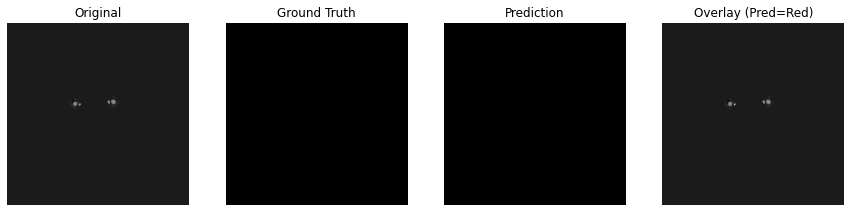

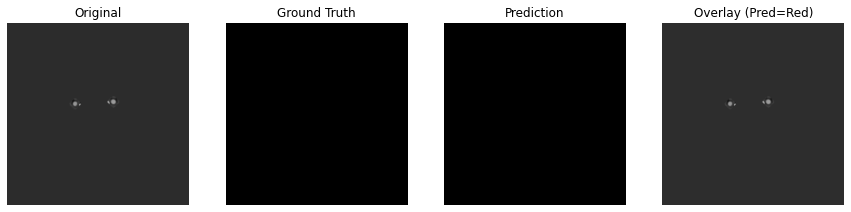

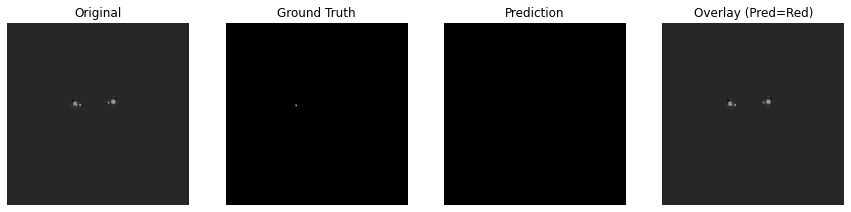

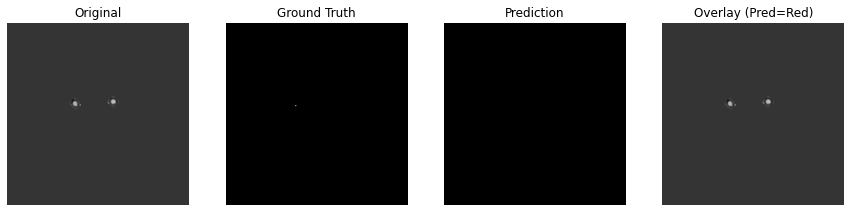

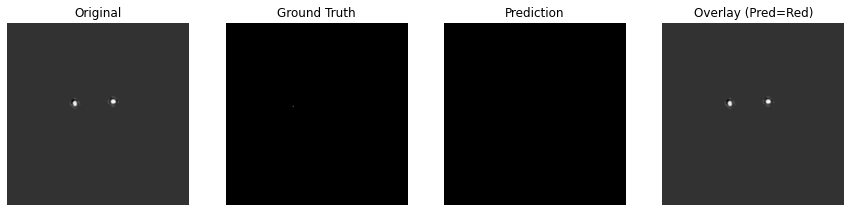

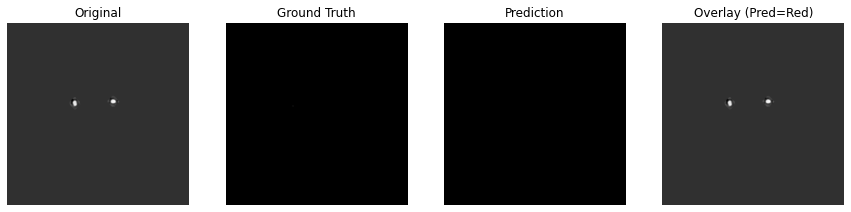

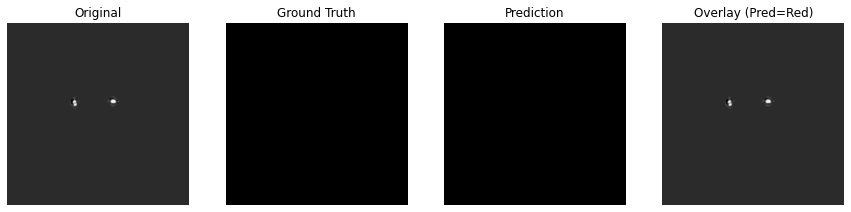

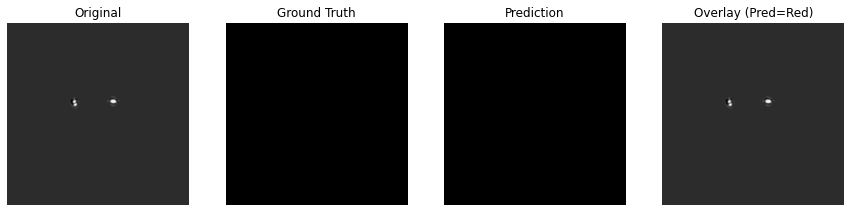

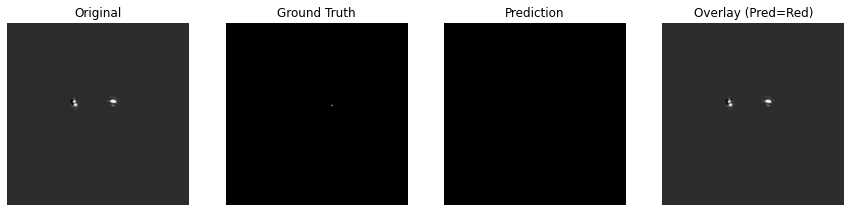

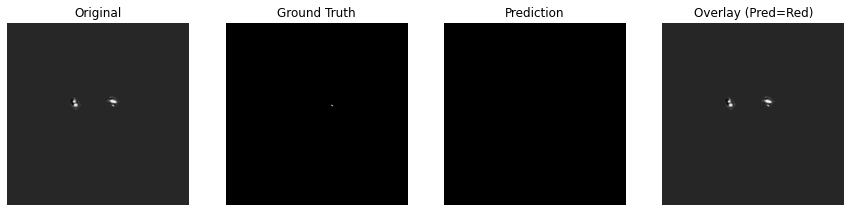

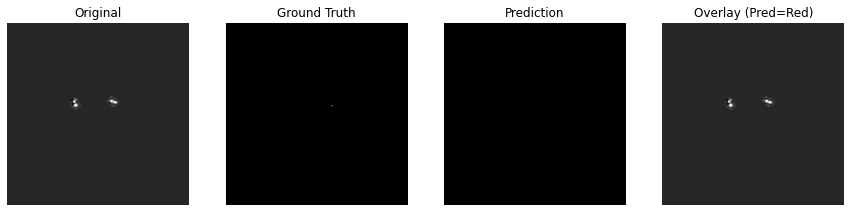

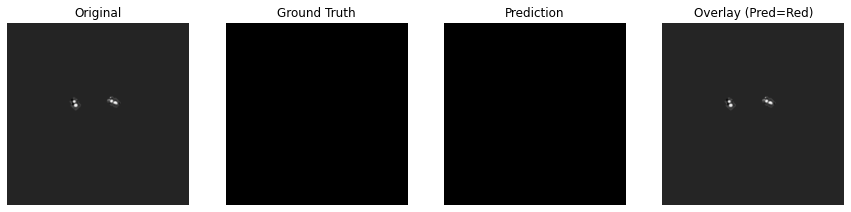

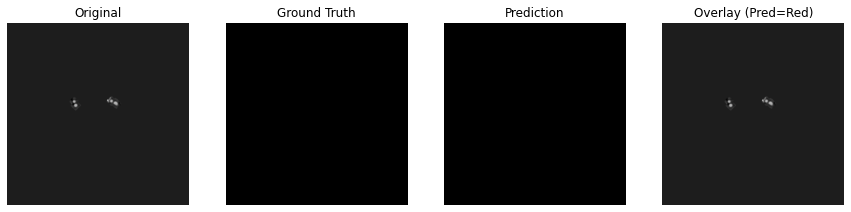

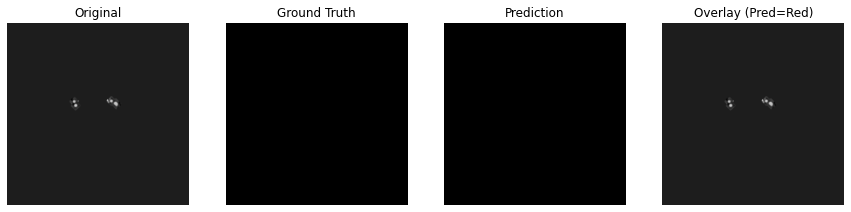

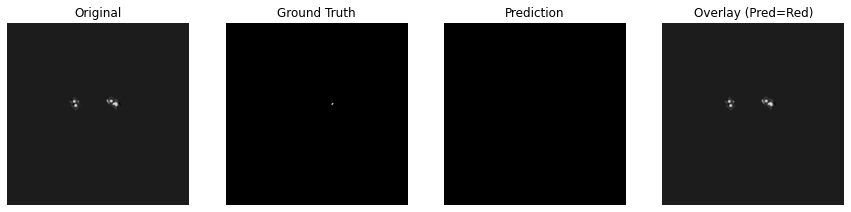

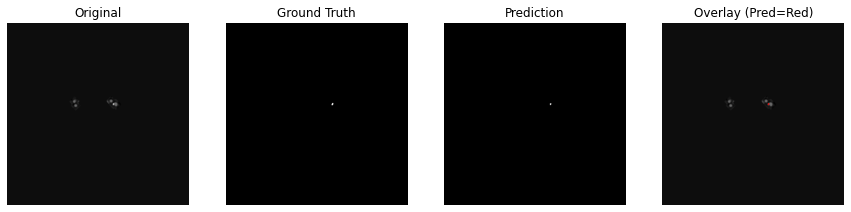

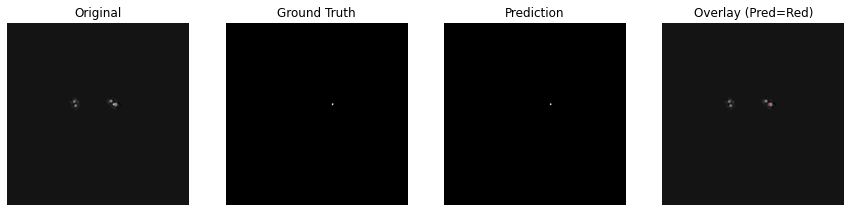

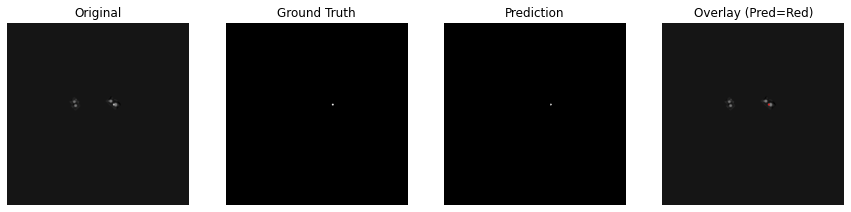

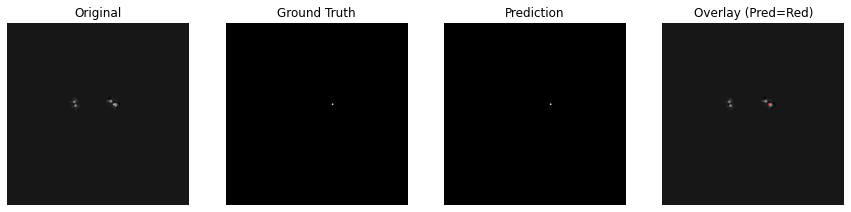

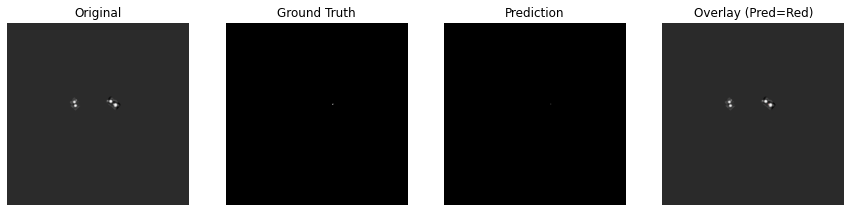

In [11]:
visualize_segmentation(original_path, gt_path, pred_path, slice_range=(110, 130))

In [19]:
import re

In [16]:
log_path = "/raid/mpsych/CACTAS/DATA/nnUNet_Mask/nnUNet_results/Dataset001_ESUS/nnUNetTrainer__nnUNetPlans__2d/fold_all/training_log_2025_2_20_12_36_10.txt"

In [17]:
epochs = []
train_loss = []
val_loss = []
pseudo_dice = []

In [20]:
# Open and read the log file
with open(log_path, "r") as f:
    epoch = None
    for line in f:
        # Match epoch
        match_epoch = re.search(r"Epoch (\d+)", line)
        if match_epoch:
            epoch = int(match_epoch.group(1))
        
        # Match train loss
        match_train = re.search(r"train_loss (-[\d\.]+)", line)
        if match_train and epoch is not None:
            train_loss.append(float(match_train.group(1)))
            epochs.append(epoch)  # Append epoch only when loss is found
        
        # Match validation loss
        match_val = re.search(r"val_loss (-[\d\.]+)", line)
        if match_val:
            val_loss.append(float(match_val.group(1)))

        # Match pseudo dice
        match_dice = re.search(r"Pseudo dice \[(\d+\.\d+)\]", line)
        if match_dice:
            pseudo_dice.append(float(match_dice.group(1)))


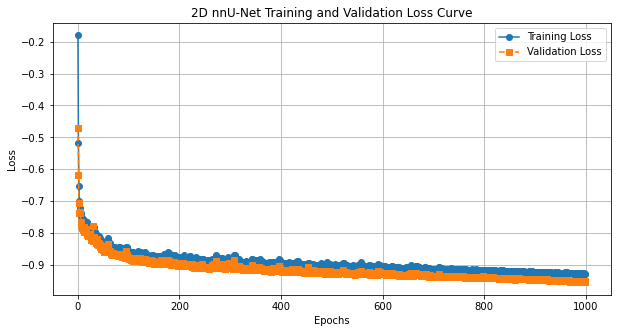

In [21]:
# Plot loss curves
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label="Training Loss", marker="o", linestyle="-")
plt.plot(epochs, val_loss, label="Validation Loss", marker="s", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("2D nnU-Net Training and Validation Loss Curve")
plt.legend()
plt.grid()
plt.show()

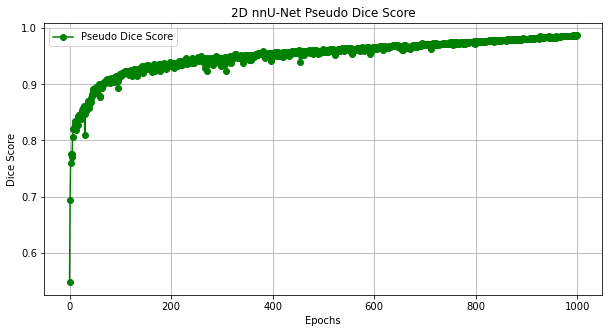

In [22]:
# Plot pseudo Dice curve
plt.figure(figsize=(10, 5))
plt.plot(epochs, pseudo_dice, label="Pseudo Dice Score", marker="o", linestyle="-", color="green")
plt.xlabel("Epochs")
plt.ylabel("Dice Score")
plt.title("2D nnU-Net Pseudo Dice Score")
plt.legend()
plt.grid()
plt.show()